In [ ]:
 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

import cvxopt


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/svm/Heart_Disease_Dataset.csv") 
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


shape of dataset is:  (1190, 12)
this dataset has not missing value
ballanced: True
--------------------- Plots --------------------------



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


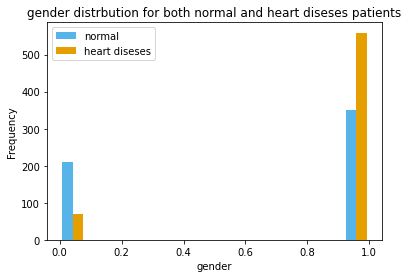

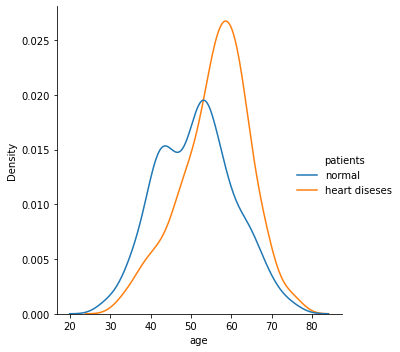

In [ ]:
shape = df.shape
print("shape of dataset is: " , shape)
missings = df.isnull().values.any()
if not missings: x = "not"
print(f"this dataset has {x} missing value")
is_ballanced = np.abs(df['target'].count() - 2 * df['target'].sum()) < 100
print(f"ballanced: {is_ballanced}")
print("--------------------- Plots --------------------------\n")
# plot the gender distrbution for both normal and heart diseses patients
colors = ['#56B4E9', '#E69F00']
names = ['normal', 'heart diseses']
plt.hist([df[df.target == 0]['sex'], df[df.target == 1]['sex']], bins = int(180/15),color = colors, label=names)
plt.legend()
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('gender distrbution for both normal and heart diseses patients')
age_plot = sns.displot(df, x="age", hue="target", kind="kde")
age_plot._legend.set_title("patients")
age_plot.set_titles("age distrbution for both normal and heart diseses patients")
new_labels = ['normal', 'heart diseses']
for t, l in zip(age_plot._legend.texts, new_labels): t.set_text(l)



In [ ]:
columns = ["age","resting bp s","cholesterol","max heart rate"]
threshold = 3
for columns in columns:
    df = df[np.abs(df[columns]-df[columns].mean()) <= (3*df[columns].std())]

In [ ]:
numerical_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].min())/(df[numerical_cols].max() - df[numerical_cols].min())

In [ ]:
df.target.replace(0 , -1 , inplace = True) 

df = df.to_numpy()


train = df[:int(len(df) * 0.7)]
test = df[int(len(df) * 0.7):]

 
X_train = train[: , :-1]
y_train = train[: , -1]


X_test = test[: , :-1]
y_test = test[: , -1]
print("Train: ", X_train.shape ,y_train.shape)
print("Test: " ,X_test.shape ,y_test.shape)


Train:  (821, 11) (821,)
Test:  (352, 11) (352,)


In [ ]:
def classification_report(y_true, y_pred):
   
    Accuracy = np.sum((y_true == y_pred)) / len(y_pred)
    Precision = np.sum(((y_pred == y_true) & (y_true == 1))) / np.sum((y_pred == 1))
    Recall = np.sum(((y_pred == y_true) & (y_true == 1))) / np.sum((y_true == 1))
    F1score = 2 * np.sum(((y_pred == y_true) & (y_true == 1))) / (np.sum(y_true == 1) + np.sum(y_pred == 1))

    return Accuracy, Precision, Recall, F1score

In [ ]:
model = SVC(kernel='linear', C=10)
# fit using X_train
model.fit(X_train, y_train)
# predict using X_test
y_pred = model.predict(X_test)

print("results of sklearn svm linear kernel:", classification_report(y_test, y_pred))



# polynomial kernel
# define model
model = SVC(kernel='poly', C=1000)
# fit using X_train
model.fit(X_train, y_train)
# predict using X_test
y_pred = model.predict(X_test)

print("results of sklearn svm polynomial kernel:", classification_report(y_test, y_pred))




model = SVC(kernel='rbf', gamma=10, C=100)
# fit using X_train
model.fit(X_train, y_train)
# predict using X_test
y_pred = model.predict(X_test)

print("results of sklearn svm RBF kernel:", classification_report(y_test, y_pred))


results of sklearn svm linear kernel: (0.7869318181818182, 0.7792207792207793, 0.7453416149068323, 0.7619047619047619)
results of sklearn svm polynomial kernel: (0.8295454545454546, 0.8258064516129032, 0.7950310559006211, 0.810126582278481)
results of sklearn svm RBF kernel: (0.9261363636363636, 0.9245283018867925, 0.9130434782608695, 0.91875)
